<a href="https://colab.research.google.com/github/darshini458/Machine-Learningprojects/blob/main/Confusion_matrix_for_classification_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
df=pd.read_csv('/content/archive.zip')
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
df=df[['diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean']]
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=1)
from sklearn.linear_model import LogisticRegression
classifier=LogisticRegression(solver='liblinear')
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)


In [7]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[101,   7],
       [ 12,  51]])

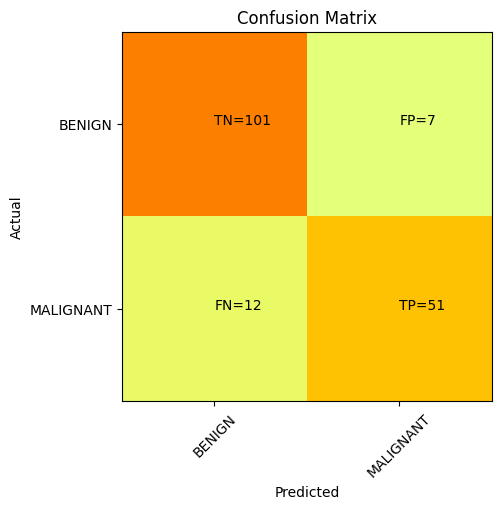

In [12]:
plt.clf()
plt.imshow(cm,interpolation='nearest',cmap=plt.cm.Wistia)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
class_names=['BENIGN','MALIGNANT']
tick_marks=np.arange(2)
plt.xticks(tick_marks,class_names,rotation=45)
plt.yticks(tick_marks,class_names)
s=(['TN','FP'],['FN','TP'])
for i in range(2):
  for j in range(2):
    plt.text(j, i, str(s[i][j]) + "=" + str(cm[i][j]))
plt.show()


In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           B       0.89      0.94      0.91       108
           M       0.88      0.81      0.84        63

    accuracy                           0.89       171
   macro avg       0.89      0.87      0.88       171
weighted avg       0.89      0.89      0.89       171

